**基本介绍**

基于树模型的方法通过逐步解构来处理问题，而不是像支持向量机或Logistic回归那样通过复杂边界来分割整个数据集。即沿着不同的特征确定性地逐步分割特征空间，以优化信息增益。


    树模型的演变: Decision Tree --> Random Forest(Bagging) 

                              --> Gradient Boosting(Boosting) --> XGBoost
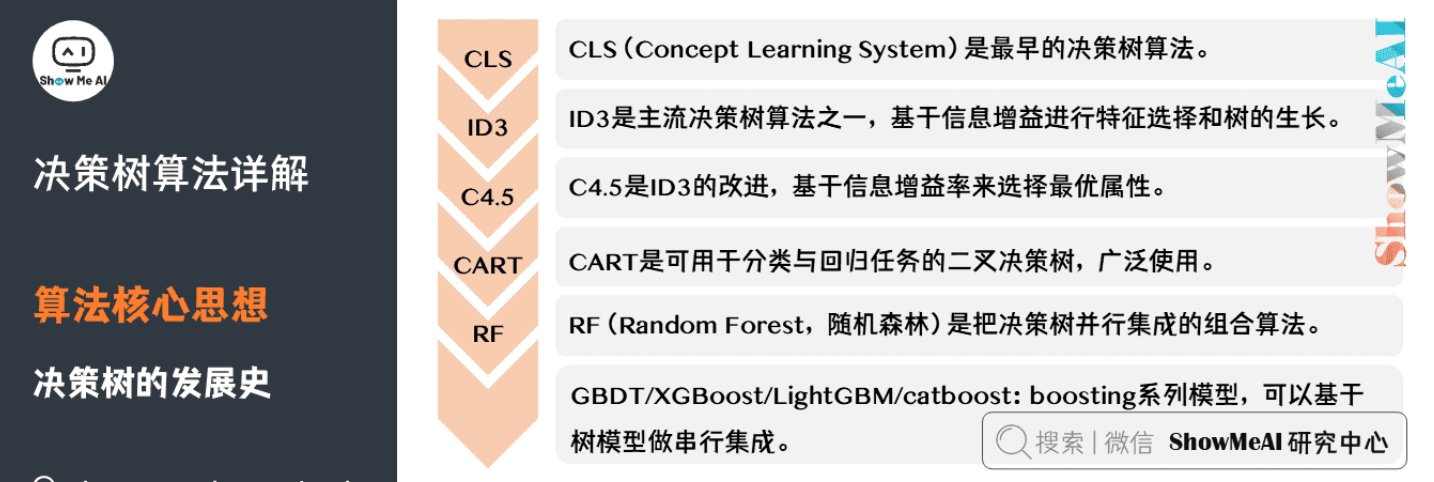

**决策树**

决策树是一个**有监督的**分类模型，本质是选择一个能带来**最大信息增益(这样能使得信息熵最快地减小，从而更快地分类)**的特征值进行分裂，直到到达结束条件或者叶子节点纯度到达一定阈值。

因此，决策树的总体流程是自根至叶的递归过程，在每个中间结点寻找一个「划分」（split or test）属性。按照「划分」指标不同，决策树分为ID3、C4.5以及CART。

**ID3算法**

采用信息熵作为分裂指标；信息熵是未知事件可能含有的信息量：
$$Ent(D)=-\sum_{i=1}^Kp_klog_2p_k\\
其中，D为样本集合，K为样本类别数，p_k是类别为k的数据的占比$$

**ID3只能处理离散特征。**

**C4.5算法**

C4.5是ID3的改进算法，主要有两个方面的优化：

1、离散特征有多个值时，分叉较多。选取分裂特征时，分叉更多的会更有利。

2、ID3只能处理离散特征。


信息增益，是选择某个属性进行划分时信息熵的变化。
$$Gain(D,a)=Ent(D)-\sum_{v=1}^v{\frac{|D^v|}{|D|}Ent(D^v)}$$
其中，$a^v$表示：特征a有v个取值，{$a^1,a^2,...,a^v$}；$D^v$表示的是在特征a取$a^v$时的样本集合；$|D|$表示样本总数量，$|D^v|$表示特征a取值为b时的样本数量。

信息增益有一个问题，它偏向取值较多的特征。原因是，当特征的取值较多时，根据此特征划分更容易得到纯度更高的子集，因此划分之后的熵更低，由于划分前的熵是一定的。因此信息增益更大，因此信息增益比较偏向取值较多的特征。


信息增益率，结合了衡量本身属性分散程度的信息增益：
$$GainRatio(D,a)=\frac{Gain(D,a)}{IV(a)}，其中IV(a)=-\sum_{v=1}^{V}\frac{|D^v|}{|D|}log_2{\frac{|D^v|}{|D|}}$$


但是，C4.5也只能一定程度上约束分叉较多的问题。

另外，为了解决连续特征处理的问题，采用的是，对特征值进行排序，并选择一个最合适的特征值，并将特征进行二分。



**CART算法**

CART，Classification And Regression Tree，既能用于分类任务，也能用于回归任务。


当特征是连续特征时，排序、中间值、计算基尼指数，选择使基尼指数最小的特征值划分成大于和小于的二叉树。

当特征是离散特征时，如果离散特征值多于两个，那么C4.5会在节点上根据特征值划分出多叉树。但是CART则不同，无论离散特征值有几个，在节点上都划分成二叉树。即等于该特征值的为一叉，不等于该特征值的为另一叉。所以**CART是二叉树**


当用于分类任务时，采用的是**基尼指数**来评估分裂特征。

信息熵越大则越混乱，因此也可以用纯度来表示信息熵。纯度越大，熵越小。基尼指数可以表示不纯度，基尼指数越小，越纯，熵越小。
基尼指数：$$Gini(D)=\sum_{k=1}^K\sum_{k' \neq k}p_kp_{k'}=1-\sum_{k=1}^Kp_k^2$$

则在属性a的条件下，数据集D的基尼指数为$$Gini(D,a)=\sum_{v=1}^V\frac{|D^v|}{|D|}Gini(D^v)$$

所以，选择使划分后基尼指数最小的那个特征。


**当用于回归任务时，采用的是**残差平方和**来评估分裂特征。**


**Q1:决策树如何进行剪枝？**

决策树剪枝分成两种：预剪枝和后剪枝。

预剪枝，是利用验证集，在训练划分的过程中，不断进行验证测试，若指标高于原来的，则进行划分；否则不划分。
降低了过拟合的风险，还显著减少了决策树的训练时间开销和测试时间开销。但泛化性能下降，存在欠拟合的风险。


后剪枝，是先训练好一颗决策树，然后再假设非叶节点为叶节点（以叶节点中数量多的类为准），利用验证集计算指标，提升则剪枝，否则不。
欠拟合风险很小，泛化性能优于预剪枝，但复杂度高，训练时间的开销比未剪枝和预剪枝决策树都要大得多。


**Q2:有缺失值特征如何进行划分判断？**

缺失值处理的基本思路是：样本赋权，权重划分。即利用有值的样本进行信息熵增益/基尼指数的计算，得到的结果再乘以$\frac{有值样本数}{总数}$


**Q3:为什么CART可用于回归任务，而ID3/C4.5不能？**

都是决策树，但受限于发表年代，ID3发表后，C4.5针对其存在问题做出了修改；而CART又做出进一步优化。

ID3和C4.5本质上都是利用label进行信息熵的计算，是离散的分类任务。

而CART中，针对回归任务时，可以采用误差平方和来处理，自然就是回归任务了。

**Q5:ID3、C4.5、CART的特征划分的方式有什么区别？**
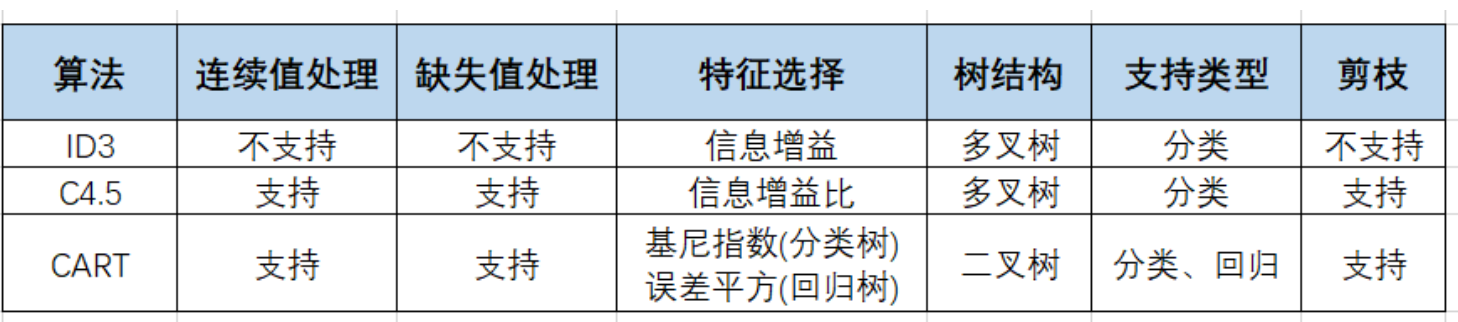
参考：https://www.showmeai.tech/article-detail/190

In [617]:
# -*- coding:utf-8 -*-
import numpy as np
import math
import re
import copy


class DecisionTree(object):
	def __init__(self, method='id3'):
		if method not in ['id3', 'cart']:
			raise ValueError('must select id3 or cart')
		if method == 'id3':
			self.cal_divide_metric = self._calcShannonEnt
		elif method == 'cart':
			self.cal_divide_metric = self._calGini
	
	def _calcShannonEnt(self, dataset):
		'''
		计算样本集合D的香农熵
		param dataset: [[f1, f2, ...., fn, label], ....]
		'''
		num_samples = len(dataset)
		label_counts = {}
		
		# 对类别进行计数
		for feat_vec in dataset:
			cur_label = feat_vec[-1]
			if cur_label not in label_counts.keys():
				label_counts[cur_label] = 0
			label_counts[cur_label] += 1
		shannon_ent = 0.0
		for key in label_counts:
			prob = float(label_counts[key]) / num_samples
			shannon_ent -= prob * math.log(prob, 2)
		
		return shannon_ent
	
	def _calGini(self, dataset):
		num_samples = len(dataset)
		label_counts = {}
		# 给所有可能分类创建字典
		for feat in dataset:
			cur_label = feat[-1]
			if cur_label not in label_counts.keys():
				label_counts[cur_label] = 0
			label_counts[cur_label] += 1
		gini = 1.0
		# 以2为底数计算香农熵
		for key in label_counts:
			prob = float(label_counts[key]) / num_samples
			gini -= prob * prob
		
		return gini
	
	def _splitSamplesByDiscreteFeat(self, dataset, axis, value):
		'''
		依据离散特征值进行数据集划分，即取出所有value=dataset[axis]的样本且不包含离散特征，从dataset中去掉
		param dataset: 样本
		param axis:特征维度
		param value: 值
		'''
		
		return [feat_vec for feat_vec in dataset if feat_vec[axis] == value]
	
	def _splitSamplesByContinuousFeat(self, dataset, axis, value, direction):
		'''
		依据连续特征值和方向对数据集进行划分，
		param dataset:样本
		param axis:特征维度
		param value:划分阈值
		param direction: 0是划分出小于value的数据样本;1是划分出大于value的数据样本集
		'''
		if direction == 0:
			return [feat_vec for feat_vec in dataset if feat_vec[axis] > value]
		else:
			return [feat_vec for feat_vec in dataset if feat_vec[axis] <= value]
			
	def _chooseBestFeatToSplit(self, dataset, feat_names):
		'''
		选择最好的特征进行样本集划分，依据信息熵增益
		'''
		num_feat = len(dataset[0]) - 1
		
		# 样本集合D的总体信息熵
		base_shanno_ent = self.cal_divide_metric(dataset)
		
		best_info_gain = 0.0
		best_feat_index = -1
		best_split_dict = {}
		
		# 遍历所有的特征，求在某特征a下的信息熵，并计算增益
		for feat_index in range(num_feat):
			feat_list = [example[feat_index] for example in dataset]
			
			# 计算在feat_index下的信息熵，并求得信息熵增益
			if type(feat_list[0]).__name__ in ['float', 'float64', 'int']:
				sorted_feats = sorted(feat_list)
				split_values = []
				# 连续值，从小到大排序后，以相邻的平均值作为划分，不断尝试，找到熵增最大的那个值
				for j in range(len(sorted_feats) - 1):
					split_values.append((sorted_feats[j] + sorted_feats[j + 1]) / 2.0)
				
				best_split_ent = 10000
				
				# 求用第j个候选划分点划分时，得到的信息熵，并记录最佳划分点
				for j in range(len(split_values)):
					value = split_values[j]
					cur_ent = 0.0
					sub_dataset_0 = self._splitSamplesByContinuousFeat(dataset, feat_index, value, 0)
					prob_0 = len(sub_dataset_0) / float(len(dataset))
					cur_ent += prob_0 * self.cal_divide_metric(sub_dataset_0)
					
					sub_dataset_1 = self._splitSamplesByContinuousFeat(dataset, feat_index, value, 1)
					prob_1 = len(sub_dataset_1) / float(len(dataset))
					cur_ent += prob_1 * self.cal_divide_metric(sub_dataset_1)
					
					if cur_ent < best_split_ent:
						best_split_ent = cur_ent
						best_split_value_index = j
				
				# 记录下最优的划分特征
				best_split_dict[feat_names[feat_index]] = split_values[best_split_value_index]
				info_gain = base_shanno_ent - best_split_ent
				
			else:
				unique_values = set(feat_list)
				cur_ent = 0.0
				# 计算在特征feat_index下的熵增
				for value in unique_values:
					sub_samples = self._splitSamplesByDiscreteFeat(dataset, feat_index, value)
					prob = len(sub_samples) / float(len(dataset))
					cur_ent += prob * self.cal_divide_metric(sub_samples)
				
				info_gain = base_shanno_ent - cur_ent
			
			if info_gain > best_info_gain:
				best_info_gain = info_gain
				best_feat_index = feat_index
		
		# 完成这一轮的特征选择，若特征是连续值则将其以之前记录的划分点为界进行二值化处理
		if type(feat_list[0]).__name__ in ['float', 'float64', 'int'] and '<=' not in feat_names[best_feat_index]:
			best_split_value = best_split_dict[feat_names[best_feat_index]]
			# 会影响到feat_names么，记录
			feat_names[best_feat_index] = feat_names[best_feat_index] + '<=' + str(best_split_value)
			# for i in range(len(dataset)):
			# 	if dataset[i][best_feat_index] <= best_split_value:
			# 		dataset[i][best_feat_index] = 1
			# 	else:
			# 		dataset[i][best_feat_index] = 0
		
		return best_feat_index
	
	def _majorityCnt(self, label_list):
		'''
		特征若已经划分完，节点下的样本还没有统一取值，则需要进行投票
		param label_list: 样本标签
		'''
		class_count = dict()

		if type(label_list[0]).__name__ == 'str_':
			label_list = [[label] for label in label_list]
		for vote in label_list:
			if vote[0] not in class_count.keys():
				class_count[vote[0]] = 0
			class_count[vote[0]] += 1
		
		return max(class_count)
	
	def _createTree(self, dataset, feat_names, dataset_full, feat_names_full):
		'''
		构建决策树，先取最优特征(若是连续值，则选择好阈值后，将特征值修改成0和1)，然后以该节点为根节点，递归实现子节点。最后不行再用投票产出
		param dataset:子样本集
		param feat_name:子样本集中的特征名称（在训练过程中，特征被选定后会被删除）
		param dataset_full:样本全集
		param feat_name_full:全部的特征名称
		'''
		label_list = [example[-1] for example in dataset]
		# 若样本类别都相同了
		if label_list.count(label_list[0]) == len(label_list):
			return label_list[0]
		
		# 若只剩下一个特征，则不再划分，投票决定
		if len(dataset[0]) == 1:
			return self._majorityCnt(dataset)
		
		best_feat_index = self._chooseBestFeatToSplit(dataset, feat_names)
		best_feat_name = feat_names[best_feat_index]
		myTree = {best_feat_name: {}}
		
		best_feat_values = [example[best_feat_index] for example in dataset]
		best_feat_unique_values = set(best_feat_values)
		
		if type(dataset[0][best_feat_index]).__name__ == 'str':
			cur_feat_name = feat_names_full.index(feat_names[best_feat_index])
			cur_feat_values_full = [example[cur_feat_name] for example in dataset_full]
			cur_feat_unique_values_full = set(cur_feat_values_full)
		
		# 删不删都可以吧?
		# del (feat_names[best_feat_index])
		
		# 针对best_feat的每一个值，都划分出一个子树
		if type(dataset[0][best_feat_index]).__name__ in ['float', 'float64', 'int']:
			feat_name = feat_names[best_feat_index]
			value = float(re.compile("(<=.+)").search(feat_name).group()[2:])
			sub_feat_names = [name.split('<=')[0] for name in feat_names[:]]
			
			sub_dataset_less = self._splitSamplesByContinuousFeat(dataset, best_feat_index, value, 0)
			myTree[best_feat_name]["true"] = self._createTree(
				sub_dataset_less, sub_feat_names, dataset_full,
				feat_names_full)
		
			sub_dataset_more = self._splitSamplesByContinuousFeat(dataset, best_feat_index, value, 1)
			myTree[best_feat_name]["false"] = self._createTree(
				sub_dataset_more, sub_feat_names, dataset_full,
				feat_names_full)
		
		else:
			for value in best_feat_unique_values:
				sub_feat_names = [name.split('<=')[0] for name in feat_names[:]]
				if type(dataset[0][best_feat_index]).__name__ == 'str':
					cur_feat_unique_values_full.remove(value)
					
				sub_dataset = self._splitSamplesByDiscreteFeat(dataset, best_feat_index, value)
				myTree[best_feat_name][value] = self._createTree(
					sub_dataset, sub_feat_names,
					dataset_full, feat_names_full)
		
		if type(dataset[0][best_feat_index]).__name__ == 'str':
			for value in cur_feat_unique_values_full:
				myTree[best_feat_name][value] = self._majorityCnt(copy.deepcopy(label_list))
		
		return myTree
		
	
	def buildTree(self, feat_names, dataset):
		self._feat_names = copy.deepcopy(feat_names)
		self.tree = self._createTree(dataset, feat_names, dataset, feat_names)
		
		return self.tree
	
	def classify(self, feat_vec):
		'''
		分类
		param feat_vec:特征向量
		'''
		pred = self._classify(self.tree, feat_vec)
		
		return pred
	
	def _classify(self, tree, feat_vec):
		'''
		树的遍历
		'''
		root = list(tree.keys())[0]
		if "<=" in root:
			threshold = float(re.compile("(<=.+)").search(root).group()[2:])
			divide_feat = re.compile("(.+<=)").search(root).group()[:-2]
			next_roots = tree[root]
			index = self._feat_names.index(divide_feat)
			if feat_vec[index] > threshold:
				flag = 'true'
			else:
				flag = 'false'
			
			for key in next_roots.keys():
				if flag == key:
					if type(next_roots[key]).__name__ == 'dict':
						pred = self._classify(next_roots[key], feat_vec)
					else:
						pred = next_roots[key]
		
		else:
			next_roots = tree[root]
			index = self._feat_names.index(root)
			for key in next_roots.keys():
				if feat_vec[index] == key:
					if type(next_roots[key]).__name__ == 'dict':
						pred = self._classify(next_roots[key], feat_vec)
					else:
						pred = next_roots[key]
		return pred
		

In [618]:
from sklearn.datasets import load_iris
iris = load_iris()

feature_names = iris['feature_names']
dataset = []
for x, y in zip(iris['data'].tolist(), iris['target'].tolist()):
    x.append(iris['target_names'][y])
    dataset.append(x)
dataset[:2], feature_names

([[5.1, 3.5, 1.4, 0.2, 'setosa'], [4.9, 3.0, 1.4, 0.2, 'setosa']],
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [619]:
dt = DecisionTree(method='cart')
tree = dt.buildTree(feature_names, dataset)
tree

{'petal length (cm)<=1.9': {'true': {'petal width (cm)<=1.7': {'true': {'petal length (cm)<=4.8': {'true': 'virginica',
      'false': {'sepal length (cm)<=5.95': {'true': 'virginica',
        'false': 'versicolor'}}}},
    'false': {'petal length (cm)<=4.8': {'true': {'petal length (cm)<=4.9': {'true': {'petal width (cm)<=1.5': {'true': {'sepal length (cm)<=6.95': {'true': 'virginica',
            'false': 'versicolor'}},
          'false': 'virginica'}},
        'false': 'versicolor'}},
      'false': {'petal width (cm)<=1.6': {'true': 'virginica',
        'false': 'versicolor'}}}}}},
  'false': 'setosa'}}

In [620]:
import matplotlib.pyplot as plt
decisionNode=dict(boxstyle="sawtooth",fc="0.8")
leafNode=dict(boxstyle="round4",fc="0.8")
arrow_args=dict(arrowstyle="<-")

## 计算树的叶子节点数量
def getNumLeafs(myTree):
    numLeafs=0
    firstStr=list(myTree.keys())[0]
    secondDict=myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            numLeafs+=getNumLeafs(secondDict[key])
        else: numLeafs+=1
    return numLeafs
 
#计算树的最大深度
def getTreeDepth(myTree):
    maxDepth=0
    firstStr=list(myTree.keys())[0]
    secondDict=myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            thisDepth=1+getTreeDepth(secondDict[key])
        else: thisDepth=1
        if thisDepth>maxDepth:
            maxDepth=thisDepth
    return maxDepth
 
#画节点
def plotNode(nodeTxt,centerPt,parentPt,nodeType):
    createPlot.ax1.annotate(nodeTxt,xy=parentPt,xycoords='axes fraction',\
    xytext=centerPt,textcoords='axes fraction',va="center", ha="center",\
    bbox=nodeType,arrowprops=arrow_args)

#画箭头上的文字
def plotMidText(cntrPt,parentPt,txtString):
    lens=len(txtString)
    xMid=(parentPt[0]+cntrPt[0])/2.0-lens*0.002
    yMid=(parentPt[1]+cntrPt[1])/2.0
    createPlot.ax1.text(xMid,yMid,txtString)
    
def plotTree(myTree,parentPt,nodeTxt):
    numLeafs=getNumLeafs(myTree)
    depth=getTreeDepth(myTree)
    firstStr=list(myTree.keys())[0]
    cntrPt=(plotTree.x0ff+(1.0+float(numLeafs))/2.0/plotTree.totalW,plotTree.y0ff)
    plotMidText(cntrPt,parentPt,nodeTxt)
    plotNode(firstStr,cntrPt,parentPt,decisionNode)
    secondDict=myTree[firstStr]
    plotTree.y0ff=plotTree.y0ff-1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            plotTree(secondDict[key],cntrPt,str(key))
        else:
            plotTree.x0ff=plotTree.x0ff+1.0/plotTree.totalW
            plotNode(secondDict[key],(plotTree.x0ff,plotTree.y0ff),cntrPt,leafNode)
            plotMidText((plotTree.x0ff,plotTree.y0ff),cntrPt,str(key))
    plotTree.y0ff=plotTree.y0ff+1.0/plotTree.totalD

def createPlot(inTree):
    fig=plt.figure(1,facecolor='white')
    fig.clf()
    axprops=dict(xticks=[],yticks=[])
    createPlot.ax1=plt.subplot(111,frameon=False,**axprops)
    plotTree.totalW=float(getNumLeafs(inTree))
    plotTree.totalD=float(getTreeDepth(inTree))
    plotTree.x0ff=-0.5/plotTree.totalW
    plotTree.y0ff=1.0
    plotTree(inTree,(0.5,1.0),'')
    plt.show()


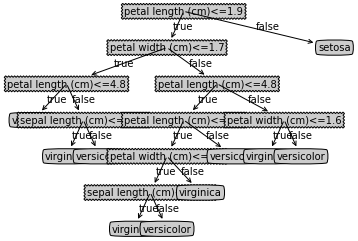

In [621]:
createPlot(tree)

In [468]:
dt.classify(dataset[139][0:4])

'virginica'

**随机森林**

随机森林是一种由决策树构成的（并行）集成算法，属于Bagging类型，通过组合多个弱分类器，最终结果通过投票或取均值，使得整体模型的结果具有较高的精确度和泛化性能，同时也有很好的稳定性。Bagging主要关注降低方差。多个弱分类器的平均，更接近数据的均值，从而降低方差。

随机森林使用CART决策树作为基分类器。

随机森林的随机体现在两点：

1、样本扰动：直接基于bootstrap sampling，有放回地取样，这样64%的样本会被取到，剩下未被取到的可用作验证集。每个基分类器的样本都不尽相同。

2、特征扰动：在基分类器划分前，随机选择部分特征， 然后再在选到的特征中找到最优分裂特征，因而使用到的特征也就不同。



随机森林优点

对于高维（特征很多）稠密型的数据适用，不用降维，无需做特征选择。构建随机森林模型的过程，亦可帮助判断特征的重要程度。可以借助模型构建组合特征。

并行集成，有效控制过拟合。工程实现并行简单，训练速度快。

对于不平衡的数据集友好，可以平衡误差。对于特征确实鲁棒性强，可以维持不错的准确度。

In [636]:
# -*- coding=utf-8 -*-
import random
import numpy as np

class RandomForest(object):
    def __init__(self, n_estimators=100, max_features=None):
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.features = []
        self.trees = []
        
        for _ in range(self.n_estimators):
            tree = DecisionTree(method='cart')
            self.trees.append(tree)
    
    def fit(self, feature_names, dataset):
        self.features = feature_names
        # 先划分数据集
        datasets = self._bootstrap_sampling(dataset)
        if self.max_features is None:
            self.max_features = int(math.sqrt(len(dataset[0])-1))
        # 逐个训练
        for i in range(self.n_estimators):
            # 随机取特征
            feat_index = np.random.choice(len(dataset[0])-1, self.max_features, replace=True).tolist()
            feat_names = [feature_names[i] for i in feat_index]
            feat_index.append(-1)
            sub_dataset = [[sample[index] for index in feat_index] for sample in datasets[i]]
        
            # 逐个build
            self.trees[i].buildTree(feat_names, sub_dataset)
    
    def predict(self, X):
        preds = []
        for i in range(self.n_estimators):
            index = [self.features.index(name) for name in self.trees[i]._feat_names]
            x = [X[j] for j in index]
            y = self.trees[i].classify(x)
            preds.append(y)
        
        return max(preds, key=preds.count)
    def _bootstrap_sampling(self, dataset):
        '''
        有放回取样
        '''
        datasets = []
        num_samples = len(dataset)
        random.shuffle(dataset)
        num_sub_samples = int(2 * float(num_samples) / self.n_estimators)
        for _ in range(self.n_estimators):
            sub_dataset_index = np.random.choice(num_sub_samples, num_sub_samples, replace=True)
            datasets.append([dataset[i] for i in sub_dataset_index])
        return datasets

In [637]:
rf = RandomForest(n_estimators=5)
rf.fit(feature_names, dataset)
rf.trees[0]

In [639]:
rf.predict(dataset[139][0:4])

ValueError: 'petal length (cm)' is not in list

**回归树**

前面提到的决策树中，有ID3、C4.5以及CART，其中CART叫做 Classification And Regression Tree，是一种既能用于分类，又能用于回归的树。

**训练回归树的步骤**

1、考虑数据集$D$上的所有特征$j$，遍历每一个特征下所有可能的取值或者切分点$s$，将数据集$D$划分成两部分$D_1$和$D_2$。

2、分别计算$D_1$和$D_2$的平方误差和，选择最小的平方误差对应的特征与分割点，生成两个子节点（将数据划分为两部分）。

3、对上述两个子节点递归调用步骤1和2，直到满足停止条件。


这样会将数据集D划分成多个子区域，每个子区域输出为该区域内所有训练样本的平均值。

In [640]:
# -*- coding:utf-8 -*-

from copy import copy
import numpy as np
from numpy import ndarray

class Node:
    attr_names = ("avg", "left", "right", "feature", "split", "mse")

    def __init__(self, avg=None, left=None, right=None, feature=None, split=None, mse=None):
        self.avg = avg
        self.left = left
        self.right = right
        self.feature = feature
        self.split = split
        self.mse = mse

    def __str__(self):
        ret = []
        for attr_name in self.attr_names:
            attr = getattr(self, attr_name)
            # Describe the attribute of Node.
            if attr is None:
                continue
            if isinstance(attr, Node):
                des = "%s: Node object." % attr_name
            else:
                des = "%s: %s" % (attr_name, attr)
            ret.append(des)

        return "\n".join(ret) + "\n"

    def copy(self, node):
        """Copy the attributes of another Node.
        Arguments:
            node {Node}
        """

        for attr_name in self.attr_names:
            attr = getattr(node, attr_name)
            setattr(self, attr_name, attr)

            
class RegressionTree:
    def __init__(self):
        self.root = Node()
        self.depth = 1
        self._rules = None
        
    def __str__(self):
        ret = []
        for i, rule in enumerate(self._rules):
            literals, avg = rule

            ret.append("Rule %d: " % i + ' | '.join(
                literals) + ' => y_hat %.4f' % avg)
        return "\n".join(ret)
    
    @staticmethod
    def _expr2literal(expr: list) -> str:
        """Auxiliary function of get_rules.
        Arguments:
            expr {list} -- 1D list like [Feature, op, split].
        Returns:
            str
        """

        feature, operation, split = expr
        operation = ">=" if operation == 1 else "<"
        return "Feature%d %s %.4f" % (feature, operation, split)

    def get_rules(self):
        """Get the rules of all the tree nodes.
            Expr: 1D list like [Feature, op, split].
            Rule: 2D list like [[Feature, op, split], label].
            Op: -1 means less than, 1 means equal or more than.
        """

        # Breadth-First Search.
        que = [[self.root, []]]
        self._rules = []

        while que:
            node, exprs = que.pop(0)

            # Generate a rule when the current node is leaf node.
            if not(node.left or node.right):
                # Convert expression to text.
                literals = list(map(self._expr2literal, exprs))
                self._rules.append([literals, node.avg])

            # Expand when the current node has left child.
            if node.left:
                rule_left = copy(exprs)
                rule_left.append([node.feature, -1, node.split])
                que.append([node.left, rule_left])

            # Expand when the current node has right child.
            if node.right:
                rule_right = copy(exprs)
                rule_right.append([node.feature, 1, node.split])
                que.append([node.right, rule_right])

    @staticmethod
    def _get_split_mse(col: ndarray, label: ndarray, split: float) -> Node:
        """Calculate the mse of label when col is splitted into two pieces.
        MSE as Loss fuction:
        y_hat = Sum(y_i) / n, i <- [1, n]
        Loss(y_hat, y) = Sum((y_hat - y_i) ^ 2), i <- [1, n]
        --------------------------------------------------------------------
        Arguments:
            col {ndarray} -- A feature of training data.
            label {ndarray} -- Target values.
            split {float} -- Split point of column.
        Returns:
            Node -- MSE of label and average of splitted x
        """

        # Split label.
        label_left = label[col < split]
        label_right = label[col >= split]

        # Calculate the means of label.
        avg_left = label_left.mean()
        avg_right = label_right.mean()

        # Calculate the mse of label.
        mse = (((label_left - avg_left) ** 2).sum() +
               ((label_right - avg_right) ** 2).sum()) / len(label)

        # Create nodes to store result.
        node = Node(split=split, mse=mse)
        node.left = Node(avg_left)
        node.right = Node(avg_right)

        return node

    def _choose_split(self, col: ndarray, label: ndarray) -> Node:
        """Iterate each xi and split x, y into two pieces,
        and the best split point is the xi when we get minimum mse.
        Arguments:
            col {ndarray} -- A feature of training data.
            label {ndarray} -- Target values.
        Returns:
            Node -- The best choice of mse, split point and average.
        """

        # Feature cannot be splitted if there's only one unique element.
        node = Node()
        unique = set(col)
        if len(unique) == 1:
            return node

        # In case of empty split.
        unique.remove(min(unique))

        # Get split point which has min mse.
        ite = map(lambda x: self._get_split_mse(col, label, x), unique)
        node = min(ite, key=lambda x: x.mse)

        return node

    def _choose_feature(self, data: ndarray, label: ndarray) -> Node:
        """Choose the feature which has minimum mse.
        Arguments:
            data {ndarray} -- Training data.
            label {ndarray} -- Target values.
        Returns:
            Node -- feature number, split point, average.
        """

        # Compare the mse of each feature and choose best one.
        _ite = map(lambda x: (self._choose_split(data[:, x], label), x),
                   range(data.shape[1]))
        ite = filter(lambda x: x[0].split is not None, _ite)

        # Return None if no feature can be splitted.
        node, feature = min(
            ite, key=lambda x: x[0].mse, default=(Node(), None))
        node.feature = feature

        return node

    def fit(self, data: ndarray, label: ndarray, max_depth=5, min_samples_split=2):
        """Build a regression decision tree.
        Note:
            At least there's one column in data has more than 2 unique elements,
            and label cannot be all the same value.
        Arguments:
            data {ndarray} -- Training data.
            label {ndarray} -- Target values.
        Keyword Arguments:
            max_depth {int} -- The maximum depth of the tree. (default: {5})
            min_samples_split {int} -- The minimum number of samples required
            to split an internal node. (default: {2})
        """

        # Initialize with depth, node, indexes.
        self.root.avg = label.mean()
        que = [(self.depth + 1, self.root, data, label)]

        # Breadth-First Search.
        while que:
            depth, node, _data, _label = que.pop(0)

            # Terminate loop if tree depth is more than max_depth.
            if depth > max_depth:
                depth -= 1
                break

            # Stop split when number of node samples is less than
            # min_samples_split or Node is 100% pure.
            if len(_label) < min_samples_split or all(_label == label[0]):
                continue

            # Stop split if no feature has more than 2 unique elements.
            _node = self._choose_feature(_data, _label)
            if _node.split is None:
                continue

            # Copy the attributes of _node to node.
            node.copy(_node)

            # Put children of current node in que.
            idx_left = (_data[:, node.feature] < node.split)
            idx_right = (_data[:, node.feature] >= node.split)
            que.append(
                (depth + 1, node.left, _data[idx_left], _label[idx_left]))
            que.append(
                (depth + 1, node.right, _data[idx_right], _label[idx_right]))

        # Update tree depth and rules.
        self.depth = depth
        self.get_rules()

    def predict_one(self, row: ndarray) -> float:
        """Auxiliary function of predict.
        Arguments:
            row {ndarray} -- A sample of testing data.
        Returns:
            float -- Prediction of label.
        """

        node = self.root
        while node.left and node.right:
            if row[node.feature] < node.split:
                node = node.left
            else:
                node = node.right

        return node.avg

    def predict(self, data: ndarray) -> ndarray:
        """Get the prediction of label.
        Arguments:
            data {ndarray} -- Testing data.
        Returns:
            ndarray -- Prediction of label.
        """

        return np.apply_along_axis(self.predict_one, 1, data)

In [652]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
boston = load_boston()

data, label = boston['data'], boston['target']

data_train, data_test, label_train, label_test = train_test_split(data, label, random_state=200)
# Train model
reg = RegressionTree()
reg.fit(data=data_train, label=label_train, max_depth=5)
# Show rules
print(reg)

Rule 0: Feature5 < 6.8420 | Feature12 < 14.4300 | Feature7 < 1.4130 | Feature0 < 11.9511 => y_hat 50.0000
Rule 1: Feature5 < 6.8420 | Feature12 < 14.4300 | Feature7 < 1.4130 | Feature0 >= 11.9511 => y_hat 27.9000
Rule 2: Feature5 < 6.8420 | Feature12 < 14.4300 | Feature7 >= 1.4130 | Feature5 < 6.5460 => y_hat 21.6833
Rule 3: Feature5 < 6.8420 | Feature12 < 14.4300 | Feature7 >= 1.4130 | Feature5 >= 6.5460 => y_hat 27.2079
Rule 4: Feature5 < 6.8420 | Feature12 >= 14.4300 | Feature0 < 7.5260 | Feature0 < 0.1778 => y_hat 20.4267
Rule 5: Feature5 < 6.8420 | Feature12 >= 14.4300 | Feature0 < 7.5260 | Feature0 >= 0.1778 => y_hat 16.1246
Rule 6: Feature5 < 6.8420 | Feature12 >= 14.4300 | Feature0 >= 7.5260 | Feature12 < 19.9200 => y_hat 14.7294
Rule 7: Feature5 < 6.8420 | Feature12 >= 14.4300 | Feature0 >= 7.5260 | Feature12 >= 19.9200 => y_hat 10.4125
Rule 8: Feature5 >= 6.8420 | Feature5 < 7.4540 | Feature0 < 8.2481 | Feature5 < 6.9510 => y_hat 28.4667
Rule 9: Feature5 >= 6.8420 | Feature5 

**梯度提升决策树**

**Boosting是什么？**
Boosting方法是采用加法模型（即基函数的线性组合）与前向分步算法的一类方法。一般而言，提升方法都是改变训练数据的概率分布（训练数据的权值分布），针对不同的训练数据分布调用基学习器学习一系列基学习器。

因此，boosting算法中的两个关键是：

1、在每一轮训练，即每一个基学习器中，如何改变样本的分布或权值？

2、如何将基学习器进行组合？

------

**Adaboost是什么？**

Adaboost是一种Boosting方法，面对boosting的两个关键问题，adaboost的解决方案是：

1、提高前一轮中被错分的样本权值，而降低正确分类的样本权值；

2、加权多数表决，即利用错误率进行赋值，错误率低的权值高，这样在表决时的权重更大。

具体地：

假设Adaboost中有$M$个基二分类器{-1,1}，其中第m个的输出为$G_m(x)$，第m个基二分类器上样本的权重分布为$\{w_{m,1},...,w_{m,N}\}$，则分类错误率表示为:
$$e_m=\sum_{i=1}^Nw_{m,i}I(G_m(x_i) \neq y_i)$$
令第m个基分类器的权重表示为：$$\alpha_m=\frac{1}{2}log\frac{1-e_m}{e_m}$$
更新样本分布权重：
$$w_{m+1,i}=\frac{w_{m,i}}{Z_m}exp(-\alpha_my_iG_m(x_i))，且Z_m=\sum_{i=1}^Nw_{m,i}exp(-\alpha_my_iG_m(x_i))$$

$Z_m$为规范化因子，使得$\sum_{i=1}^Nw_{m,i}=1$，因此最终Adaboost的预测表达式为：
$$f(x)=\sum_{m=1}^M\alpha_mG_m(x)$$

从另外一个角度看，Adaboost的损失函数为指数损失函数，即$L(y, f(x))=exp(-yf(x))$


**提升树算法是什么？**

提升树算法是指以决策树为基函数的提升算法。不同提升树算法的本质区别在于损失函数的不同。比如分类任务采用指数损失、回归任务采用平方误差损失以及一般决策问题中采用的一般损失函数。


**GBDT又是什么？**

梯度提升决策树,GBDT(Gradient Boosting Decision Tree)，又叫 MART（Multiple Additive Regression Tree），它通过构造一组弱的学习器（树），并把多颗**CART树**的结果累加起来作为最终的预测输出。当二分类时，GBDT是Adaboost的一个特例。因此，GBDT的预测公式表示为：
$$f_M(x)=\sum_{i=1}^MT(x, \theta_i)$$
其中，$M$是GBDT中CART回归树的数量，$T(x, \theta_i)$是第$i$棵CART回归树的输出。

无论是处理回归问题还是二分类以及多分类，GBDT使用的决策树通通都是都是CART回归树。为什么不用CART分类树呢？因为GBDT每次迭代要拟合的是梯度值，是连续值所以要用回归树。


对于函数空间，仅仅是将参数的拟合换为函数的拟合，每次仍然迭代的是一个负梯度，只是其最终得到的是增量函数的累加而不是增量参数累加。
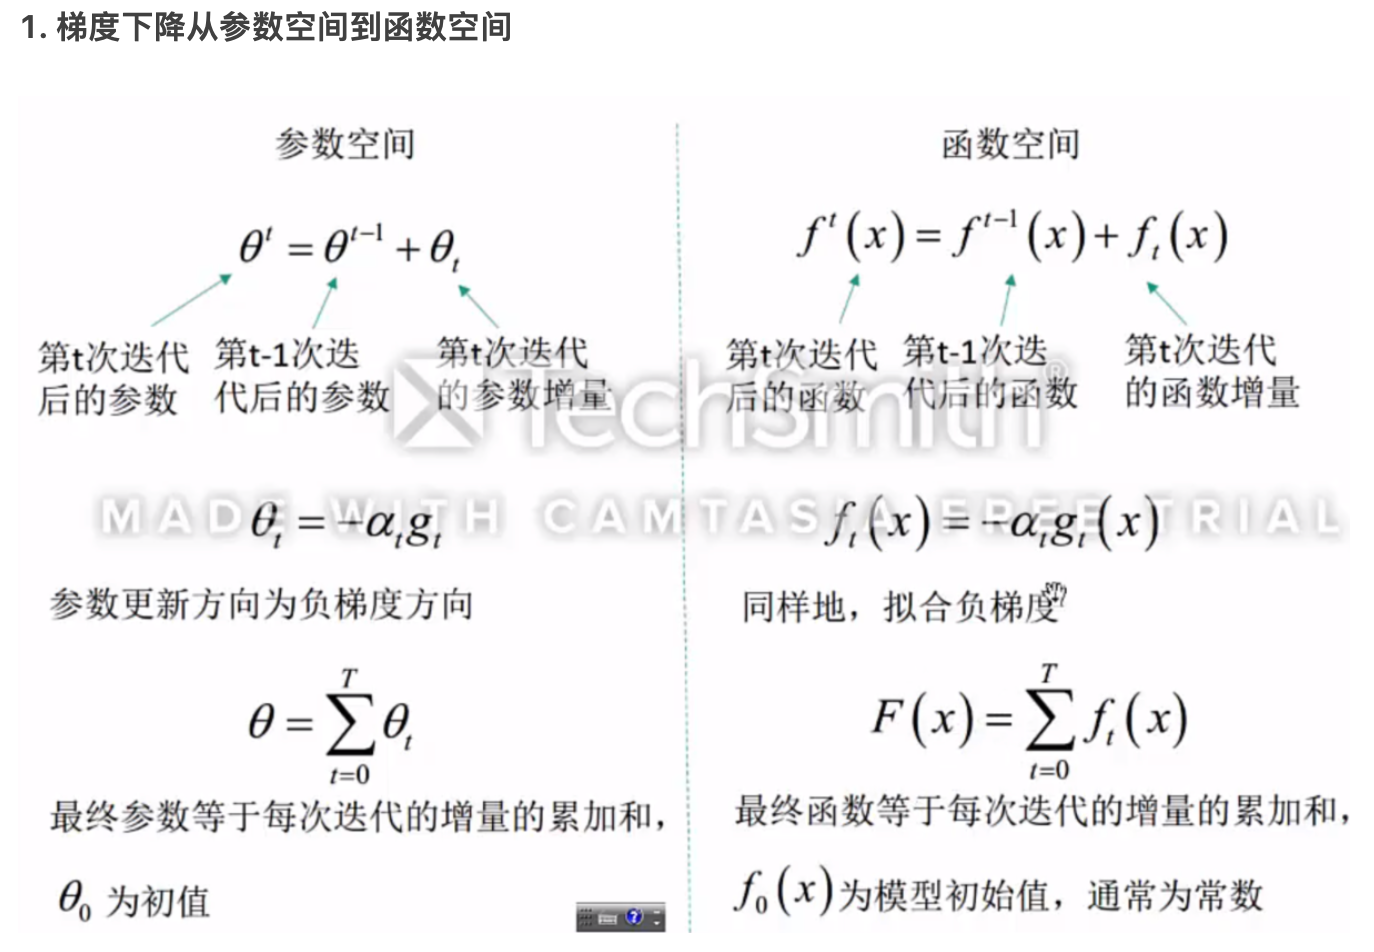


特别地，当使用平方损失函数时，负梯度就等于$y_{label}-y_{pred}$，即狭义上的残差是负梯度的特例。

**一定要看这个！https://www.jianshu.com/p/6075922a8bc3**




**Q1:Adaboost和GBDT的区别是什么？**

二者都属于boosting提升方法，但损失函数不同：AdaBoost使用指数损失函数，通过提升错分数据点的权重来定位模型的不足；而Gradient Boosting是通过算梯度来定位模型的不足，可以使用多种不同的损失函数，比如指数、MSE等。

adaboost中样本的分布是显式赋值的，即存在一个$\alpha_i$，而GBDT中，样本最终的值=初始值+梯度，可以理解成是原值乘以了系数，但是以梯度的形式存在。

**Q2:GBDT中不同损失函数的差别？**

1、分类时的损失函数：

    a、指数损失函数
    
    b、对数损失函数
    
2、回归时的损失函数：

    a、绝对值损失函数
    
    b、均方损失函数
    
    c、Huber损失函数
    
    d、分位数损失函数
    
Huber和分位数主要是减少异常点对损失函数的影响。

参考：https://blog.csdn.net/qfikh/article/details/102884930

**Q3:GBDT如何做正则化？**

1、Shrinkage

    即在每个基学习器上添加一个学习率，这是Shrinkage的思想。可避免学习率为1时过快地拟合。

2、子采样

3、CART剪枝

**Q4:为什么GBDT的树深度较RF通常都比较浅？**

设计机器学习模型需要有两个方面要考虑，即方差和偏差。方差体现了模型的复杂度，也即泛化能力，而偏差体现了模型的预测能力。

RF是多棵树并行，投票，因此对每个树的要求都比较高，因此RF的树比较深，方差大。

而GBDT是多棵树依赖，加法模型，最终预测能力不错，整体上保证了偏差，因此只需要考虑方差更小的基模型即可，故而方差小。

**Q5:GBDT中可以并行的部分都有哪些？**

1、计算每个样本的负梯度

2、分裂挑选最佳特征及其分割点时，对特征计算相应的误差及均值时

3、更新每个样本的负梯度时

4、最后预测过程中，每个样本将之前的所有树的结果累加的时候
    

In [668]:
# -*- coding:utf-8 -*-

# 损失函数

class SquaresError(object):

    def initialize_f_0(self, data):
        data['f_0'] = data['label'].mean()
        return data['label'].mean()

    def calculate_residual(self, data, iter):
        res_name = 'res_' + str(iter)
        f_prev_name = 'f_' + str(iter - 1)
        data[res_name] = data['label'] - data[f_prev_name]

    def update_f_m(self, data, trees, iter, learning_rate, logger):
        f_prev_name = 'f_' + str(iter - 1)
        f_m_name = 'f_' + str(iter)
        data[f_m_name] = data[f_prev_name]
        for leaf_node in trees[iter].leaf_nodes:
            data.loc[leaf_node.data_index, f_m_name] += learning_rate * leaf_node.predict_value
        # 打印每棵树的 train loss
        self.get_train_loss(data['label'], data[f_m_name], iter, logger)

    def update_leaf_values(self, targets, y):
        return targets.mean()

    def get_train_loss(self, y, f, iter, logger):
        loss = ((y - f) ** 2).mean()
        logger.info(('第%d棵树: mse_loss:%.4f' % (iter, loss)))

In [669]:
# 回归树节点
class Node:
    def __init__(self, data_index, logger=None, split_feature=None, split_value=None, is_leaf=False, loss=None,
                 deep=None):
        self.loss = loss
        self.split_feature = split_feature
        self.split_value = split_value
        self.data_index = data_index
        self.is_leaf = is_leaf
        self.predict_value = None
        self.left_child = None
        self.right_child = None
        self.logger = logger
        self.deep = deep

    def update_predict_value(self, targets, y):
        self.predict_value = self.loss.update_leaf_values(targets, y)

    def get_predict_value(self, instance):
        if self.is_leaf:
            return self.predict_value
        if instance[self.split_feature] < self.split_value:
            return self.left_child.get_predict_value(instance)
        else:
            return self.right_child.get_predict_value(instance)

In [670]:
# 回归树
class Tree:
    def __init__(self, data, max_depth, min_samples_split, features, loss, target_name, logger):
        self.loss = loss
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.features = features
        self.logger = logger
        self.target_name = target_name
        self.remain_index = [True] * len(data)
        self.leaf_nodes = []
        self.root_node = self.build_tree(data, self.remain_index, depth=0)

    def build_tree(self, data, remain_index, depth=0):
        """
        此处有三个树继续生长的条件：
            1: 深度没有到达最大, 树的深度假如是3， 意思是需要生长成3层, 那么这里的depth只能是0, 1
                所以判断条件是 depth < self.max_depth - 1
            2: 点样本数 >= min_samples_split
            3: 此节点上的样本的 target_name 值不一样（如果值 一样说明已经划分得很好了，不需要再分）
        """
        now_data = data[remain_index]

        if depth < self.max_depth - 1 \
                and len(now_data) >= self.min_samples_split \
                and len(now_data[self.target_name].unique()) > 1:
            se = None
            split_feature = None
            split_value = None
            left_index_of_now_data = None
            right_index_of_now_data = None
            for feature in self.features:
                feature_values = now_data[feature].unique()
                for fea_val in feature_values:
                    # 尝试划分
                    left_index = list(now_data[feature] < fea_val)
                    right_index = list(now_data[feature] >= fea_val)
                    left_se = calculate_se(now_data[left_index][self.target_name])
                    right_se = calculate_se(now_data[right_index][self.target_name])
                    sum_se = left_se + right_se

                    if se is None or sum_se < se:
                        split_feature = feature
                        split_value = fea_val
                        se = sum_se
                        left_index_of_now_data = left_index
                        right_index_of_now_data = right_index

            node = Node(remain_index, self.logger, split_feature, split_value, deep=depth)
            """
            trick for DataFrame, index revert
            下面这部分代码是为了记录划分后样本在原始数据中的的索引
            DataFrame的数据索引可以使用True和False
            所以下面得到的是一个bool类型元素组成的数组
            利用这个数组进行索引获得划分后的数据
            """
            left_index_of_all_data = []
            for i in remain_index:
                if i:
                    if left_index_of_now_data[0]:
                        left_index_of_all_data.append(True)
                        del left_index_of_now_data[0]
                    else:
                        left_index_of_all_data.append(False)
                        del left_index_of_now_data[0]
                else:
                    left_index_of_all_data.append(False)

            right_index_of_all_data = []
            for i in remain_index:
                if i:
                    if right_index_of_now_data[0]:
                        right_index_of_all_data.append(True)
                        del right_index_of_now_data[0]
                    else:
                        right_index_of_all_data.append(False)
                        del right_index_of_now_data[0]
                else:
                    right_index_of_all_data.append(False)

            node.left_child = self.build_tree(data, left_index_of_all_data, depth + 1)
            node.right_child = self.build_tree(data, right_index_of_all_data, depth + 1)
            return node
        else:
            node = Node(remain_index, self.logger, is_leaf=True, loss=self.loss, deep=depth)
            if len(self.target_name.split('_')) == 3:
                label_name = 'label_' + self.target_name.split('_')[1]
            else:
                label_name = 'label'
            node.update_predict_value(now_data[self.target_name], now_data[label_name])
            self.leaf_nodes.append(node)
            return node


def calculate_se(label):
    mean = label.mean()
    se = 0
    for y in label:
        se += (y - mean) * (y - mean)
    return se

In [675]:
import math
import pandas as pd

# 回归树
class GradientBoostingRegressor:
    def __init__(self, learning_rate, n_trees, max_depth, min_samples_split=2, is_log=False, is_plot=False):
        self.loss = SquaresError()
        self.learning_rate = learning_rate
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.features = None
        self.trees = {}
        self.f_0 = {}
        self.is_log = is_log
        self.is_plot = is_plot
    
    def fit(self, data):
        """
        :param data: pandas.DataFrame, the features data of train training
        """
        # 掐头去尾， 删除id和label，得到特征名称
        self.features = list(data.columns)[1: -1]
        # 初始化 f_0(x)
        # 对于平方损失来说，初始化 f_0(x) 就是 y 的均值
        self.f_0 = self.loss.initialize_f_0(data)
        # 对 m = 1, 2, ..., M
        for iter in range(1, self.n_trees+1):
        
            # 计算负梯度--对于平方误差来说就是残差
            self.loss.calculate_residual(data, iter)
            target_name = 'res_' + str(iter)
            self.trees[iter] = Tree(data, self.max_depth, self.min_samples_split,
                                    self.features, self.loss, target_name, logger)
            self.loss.update_f_m(data, self.trees, iter, self.learning_rate, logger)
            if self.is_plot:
                plot_tree(self.trees[iter], max_depth=self.max_depth, iter=iter)
                
    def predict(self, data):
        data['f_0'] = self.f_0
        for iter in range(1, self.n_trees+1):
            f_prev_name = 'f_' + str(iter - 1)
            f_m_name = 'f_' + str(iter)
            data[f_m_name] = data[f_prev_name] + \
                             self.learning_rate * \
                             data.apply(lambda x: self.trees[iter].root_node.get_predict_value(x), axis=1)
        data['predict_value'] = data[f_m_name]
        

In [684]:
dataset = pd.DataFrame(data=[[1, 5, 20, 1.1],
                                  [2, 7, 30, 1.3],
                                  [3, 21, 70, 1.7],
                                  [4, 30, 60, 1.8],
                                  ], columns=['id', 'age', 'weight', 'label'])

In [677]:
model = GradientBoostingRegressor(learning_rate=0.1, n_trees=5, max_depth=3,
                                          min_samples_split=2, is_log=False, is_plot=False)

In [686]:
model.fit(dataset)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:root:第1棵树: mse_loss:0.0663
INFO:root:第2棵树: mse_loss:0.0537
INFO:root:第3棵树: mse_loss:0.0435
INFO:root:第4棵树: mse_loss:0.0352
INFO:root:第5棵树: mse_loss:0.0285


In [695]:
[node.predict_value for node in model.trees[1].leaf_nodes]

[-0.375, -0.17500000000000004, 0.22499999999999987, 0.32499999999999996]

总结来看，GBDT的训练流程为：

1、初始$f_{0,i}$，即所有样本的label均值

2、计算样本的残差$res_{m,i}=label_{i} - f_{m-1, i}$

3、构建第m颗树，遍历所有特征，逐个计算在某特征值下，分成两堆后计算平方损失，选择损失最小的特征。一直重复该步骤，直到树深、类别数、样本数等条件不再满足而停止树的构建。这样就能得到一颗有叶子节点的树。每个叶子节点的值为其所包含样本的**残差均值**，即predict_value。

4、重复2-3，直到所有的树都构建完成

预测过程：

拿到训练数据的$f_0$，然后遍历每一颗树，依次与对应叶子节点的predict_value相加


**XGBoost**

XGBoost本质上还是一个GBDT，但进行了算法和工程上的许多改进。

一般来说，损失包含两部分，即模型损失和正则化损失。GBDT中只考虑了模型损失，XGBoost则添加了对应的正则损失。使得模型不易过拟合。当前损失可以表示为：
$$L_m = \sum_{i=1}^N l(y_i, y_{pred}^m) + \sum_{j=1}^m w(f_j) \\
L_m = \sum_{i=1}^N l(y_i, y_{pred}^{m-1}+f_m(x_i)) + w(f_m) + constant$$

运用二阶泰勒展开，可以得到
$$L_m = \sum_{i=1}^N [l(y_i, y_{pred}^{m-1}) + g_if_m(x_i) + \frac{1}{2}h_if_m^2(x_i)] + w(f_m) + constant \\
=\sum_{i=1}^N [ g_if_m(x_i) + \frac{1}{2}h_if_m^2(x_i)] + w(f_m)$$

其中，$g_i = \frac{\partial l(y_i, y_{pred}^{m-1})}{\partial y_{pred}^{m-1}}, h_i=\frac{\partial^2 l(y_i, y_{pred}^{m-1})}{\partial^2y_{pred}^{m-1}}$，也即函数空间的偏导。（牛顿法）



在XGBoost中，模型的复杂度是用叶子节点数目和叶节点表示向量来表示的，即
$$w(f)=\gamma T + \frac{1}{2}\lambda \sum_{i=1}^{T} w_i^2$$
这种情况下，XGBoost的损失函数就可以表示为：
$$L_m = \sum_{i=1}^N [ g_iw(x_i) + \frac{1}{2}h_iw^2(x_i)] + \gamma T + \frac{1}{2}\lambda \sum_{i=1}^{T} w_i^2\\
=\sum_{j=1}^T [(\sum_{i \in I_j} g_i)w_j + \frac{1}{2} (\sum_{i \in I_j} h_i + \lambda)w_j^2] + \gamma T\\
=\sum_{j=1}^T [G_jw_j + \frac{1}{2} (H_j + \lambda)w_j^2] + \gamma T$$

这样化简是依据，$x_i$会落入某一个叶节点$j$，这样x_i的预测值就是$w_j$。因此也可以得到第j个节点的表达式为：
$$w_j=-\frac{G_j}{H_j+\lambda}$$
故而损失函数表示为：
$$L_m = -\frac{1}{2} \sum_{j=1}^T\frac{G_j^2}{H_j+\lambda} + \gamma T$$
举个例子：
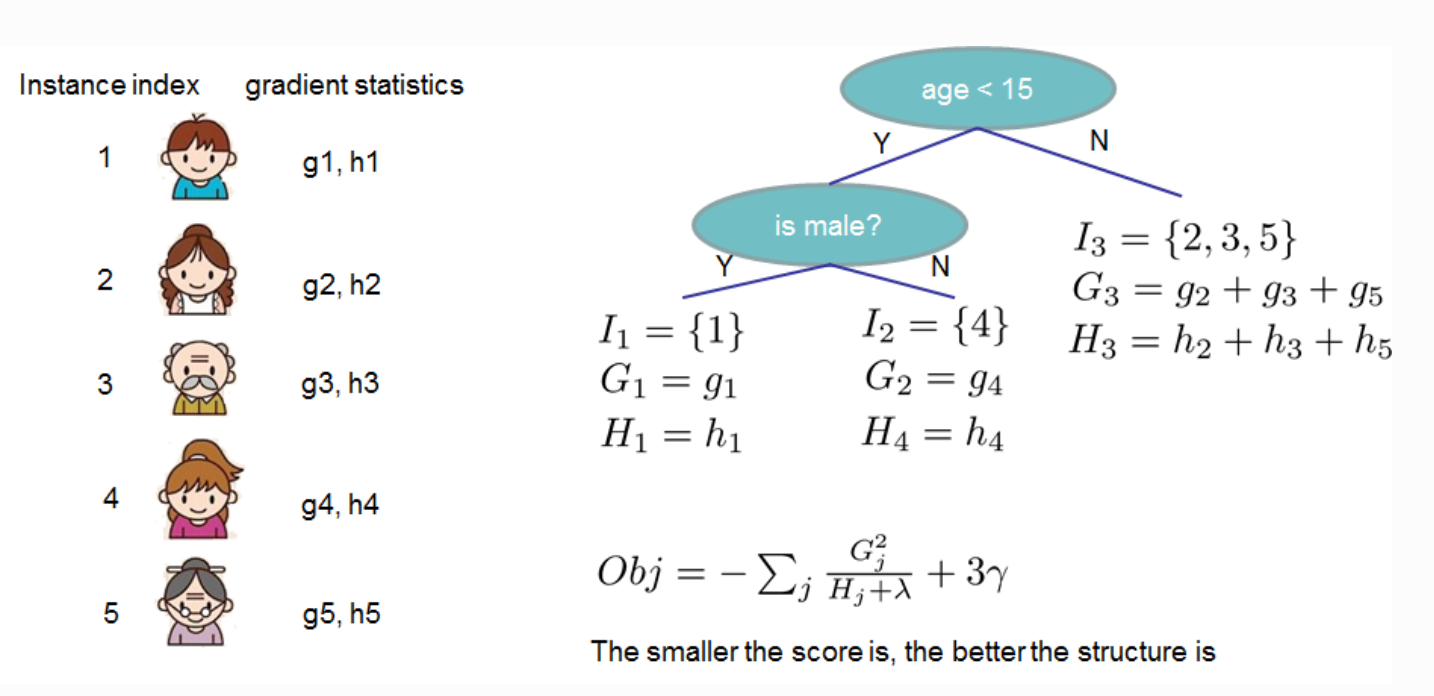

**Q1:XGBoost特点**

1、损失函数=模型损失+正则损失，

2、用二阶泰勒展开来近似

3、正则损失用 (叶子节点的个数T + 树上叶子节点的得分w的L2正则) 来共同评估

4、最终，损失函数是用一阶导和二阶导共同表达的，如上图。

参考：https://www.cnblogs.com/mantch/p/11164221.html

**Q2:XGBoost如何并行？**

We can see that this is a sequential algorithm. Therefore, we can't parallelize the algorithm like Random Forest. We can only parallelize the algorithm in the tree building step. Therefore, the problem reduces to parallel decision tree building.

xgboost在训练之前，预先对数据进行了排序，然后保存为block结构，后面的迭代中重复地使用这个结构，大大减小计算量。这个block结构也使得并行成为了可能，在进行节点的分裂时，需要计算每个特征的增益，最终选增益最大的那个特征去做分裂，那么各个特征的增益计算就可以开多线程进行

可以考虑的并行方案：

1、同一深度的节点构建；（收益不大，受限于不同节点样本分布不均）

2、在每个节点上对每个特征，并行进行 （依据特征值进行排序，然后计算损失选择最优特征值）（收益尚可，对于样本数量较少的节点，开线程、上下文切换等操作的开销更大）

3、在一开始时，对每个特征进行排序，保存下。然后迭代，并行进行（针对某一特征，在同一层所有节点里都进行特征选择）（收益不错）

参考：http://zhanpengfang.github.io/418home.html

**Q3:XGBoost存在的缺点**

尽管可以并行，但依然需要遍历样本，进行排序。而且，需要保存样本梯度统计值的索引，额外增加了内存空间。

LightGBM

为了解决XGBoost中存在的遍历样本+额外空间的问题，LightGBM使用了

1、单边梯度抽样算法； GBDT算法的梯度大小可以反应样本的权重，梯度越小说明模型拟合的越好。LightGBM利用单边梯度抽样Gradient One-Side Sampling，关注梯度较高的样本，而随机抽样梯度小的样本。 即对梯度值进行排序，取前x%的，并从1-x%中选后b%，通过对b%的样本赋权(1-a)/b来放大这部分样本的权重。

2、直方图算法；直方图是将连续的特征离散化为k个离散特征。利用直方图算法我们无需遍历数据，只需要遍历k个bin即可找到最佳分裂点。

3、互斥特征捆绑算法；

4、基于最大深度的 Leaf-wise 的垂直生长算法；

5、类别特征最优分割；

6、特征并行和数据并行；

7、缓存优化。